In [1]:
#read data from csv
import pandas as pd 
import numpy as np
#data = pd.read_csv(""Data1/1_4_Mid.csv"",sep=';') 
#data.head()

In [2]:
#get specific data 
#data.take([0])

In [3]:
#drop unneccessery data
#data=data.drop(['ts', 'D'], axis=1)


In [4]:
#turn dataset pandas to numpy
'''arr=data.to_numpy()
trans=arr.transpose()
max_arr=np.zeros(16)
min_arr=np.zeros(16)
for i in range(len(trans)):
    max_arr[i]=np.max(trans[i])
    min_arr[i]=np.min(trans[i])
max_arr'''

'arr=data.to_numpy()\ntrans=arr.transpose()\nmax_arr=np.zeros(16)\nmin_arr=np.zeros(16)\nfor i in range(len(trans)):\n    max_arr[i]=np.max(trans[i])\n    min_arr[i]=np.min(trans[i])\nmax_arr'

In [5]:
#find min and max values
'''max_value = np.max(arr)
min_value = np.min(arr)
print("min=",min_value ,"max=",max_value )'''

'max_value = np.max(arr)\nmin_value = np.min(arr)\nprint("min=",min_value ,"max=",max_value )'

In [6]:
#normalization formula
#(x_i)-min(x)
'''arrr=arr-min_arr
#max(x)-min(x)

div=max_arr-min_arr

#arr/div
arr=arr/div
arr'''

'arrr=arr-min_arr\n#max(x)-min(x)\n\ndiv=max_arr-min_arr\n\n#arr/div\narr=arr/div\narr'

In [7]:
#arr

In [2]:
#üstteki kısımların fonksiyon hali
def read_data(path):
    data = pd.read_csv(path,sep=';')
    #drop unneccessery data
    data=data.drop(['ts', 'D'], axis=1)
    arr=data.to_numpy()
    return arr
def normalize_data1(arr):
    

    trans=arr.transpose()
    
    max_arr=np.zeros(16)
    min_arr=np.zeros(16)
    for i in range(len(trans)):
        max_arr[i]=np.max(trans[i])
        min_arr[i]=np.min(trans[i])
    #normalization formula
    #(x_i)-min(x)
    print('min ', min_arr.shape)
    print(min_arr)
    arr=arr-min_arr
    for i in range(arr.shape[1]):
        arr[:,i] = np.convolve(arr[:,i], np.ones(5), 'same')
        arr = arr - np.min(arr)
        arr = arr / np.max(arr)
    return arr

def normalize_data(arr):
    trans=arr.transpose()
    max_arr=np.zeros(16)
    min_arr=np.zeros(16)
    for i in range(len(trans)):
        max_arr[i]=np.max(trans[i])
        min_arr[i]=np.min(trans[i])
    #normalization formula
    #(x_i)-min(x)
    arr=arr-min_arr
    #max(x)-min(x)

    div=max_arr-min_arr
    #arr/div
    arr=arr/div
    return arr
    
    
    

In [9]:
a=read_data("Data1/1_4_High.csv")
a[1]

array([232, 227, 245, 251, 207, 243, 239, 250, 207, 223, 245, 266, 202,
       230, 249, 261], dtype=int64)

In [10]:


#color generator function
def getColor(x):
    #color array
    color=["#de4118","#e1542f","#e46646","#e77a5d",
       "#eb8d74","#eea08b","#f1b3a2","#f5c6b9",
       "#f8d9d0","#fbece7","#ffffff"
      ]
    if x==0:
        return color[10]
    elif x>0 and x<=0.1:
        return color[9]
    elif x>0.1 and x<=0.2:
        return color[8]
    elif x>0.2 and x<=0.3:
        return color[7]
    elif x>0.3 and x<=0.4:
        return color[6]
    elif x>0.4 and x<=0.5:
        return color[5]
    elif x>0.5 and x<=0.6:
        return color[4]
    elif x>0.6 and x<=0.7:
        return color[3]
    elif x>0.7 and x<=0.8:
        return color[2]
    elif x>0.8 and x<=0.9:
        return color[1]
    elif x>0.9 and x<=1:
        return color[0]
        

In [380]:

from tkinter import *
import time
from tkinter import filedialog as fd 

root=Tk()
root.title("Mat Project")
root.geometry("860x400")
global flag#for the stop operation
flag=False
#funct
def funct():
    global flag
    flag=False
    #file chooser
    name= fd.askopenfilename() 
    print("file path is ",name)
    #read the data
    f=read_data(name)
    #normalize the data
    array1=normalize_data(f)
    array2=normalize_data1(f)
    
    print(array1[0])
    
    for i in range(len(array1)):
       
        if flag==True:#if stop is true clear GUI
            for i in range(4):
                labels_0[i].config(bg="white",text="sensor_"+str(i))
                labels_1[i].config(bg="white",text="sensor_"+str(i+4))
                labels_2[i].config(bg="white",text="sensor_"+str(i+8))
                labels_3[i].config(bg="white",text="sensor_"+str(i+12))
                
                Blabels_0[i].config(bg="white",text="sensor_"+str(i))
                Blabels_1[i].config(bg="white",text="sensor_"+str(i+4))
                Blabels_2[i].config(bg="white",text="sensor_"+str(i+8))
                Blabels_3[i].config(bg="white",text="sensor_"+str(i+12))
                
                root.update()
                
            return#exit from the function
        #the color operation is being handled here
        for j in range(16):
            row=int(j/4)
            col=int(j%4)
            if row==0:
                    labels_0[col].config(bg=getColor(array1[i][j]),text="{:.4f}".format(array1[i][j]))
                    Blabels_0[col].config(bg=getColor(array2[i][j]),text="{:.4f}".format(array1[i][j]))
            elif row==1:
                    labels_1[col].config(bg=getColor(array1[i][j]),text="{:.4f}".format(array1[i][j]))
                    Blabels_1[col].config(bg=getColor(array2[i][j]),text="{:.4f}".format(array1[i][j]))
            elif row==2:
                    labels_2[col].config(bg=getColor(array1[i][j]),text="{:.4f}".format(array1[i][j]))
                    Blabels_2[col].config(bg=getColor(array2[i][j]),text="{:.4f}".format(array1[i][j]))
            elif row==3:
                    labels_3[col].config(bg=getColor(array1[i][j]),text="{:.4f}".format(array1[i][j]))
                    Blabels_3[col].config(bg=getColor(array2[i][j]),text="{:.4f}".format(array1[i][j]))
            
            root.update()
        root.after(34)

def stop():#just arrenges the stop flag
    global flag
    flag=True
    

   
    
        
#each label array is a row
labels_0=[]#row 1
labels_1=[]#row 2
labels_2=[]#row 3
labels_3=[]#row 4
#setting the each lablel
for i in range(4):
    #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=0,column=i)
    labels_0.append(lab)
      #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i+4),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=1,column=i)
    labels_1.append(lab)
      #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i+8),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=2,column=i)
    labels_2.append(lab)
      #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i+12),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=3,column=i)
    labels_3.append(lab)

lab=Label(root,width="20",height="4",text="<=Transform=>",bg="white",borderwidth=1, relief="solid")
lab.grid(row=1,column=4)

#second part
Blabels_0=[]#row 1
Blabels_1=[]#row 2
Blabels_2=[]#row 3
Blabels_3=[]#row 4


for i in range(4):
    #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=0,column=i+5)
    Blabels_0.append(lab)
      #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i+4),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=1,column=i+5)
    Blabels_1.append(lab)
      #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i+8),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=2,column=i+5)
    Blabels_2.append(lab)
      #setting columns 
    lab=Label(root,width="12",height="5",text="sensor_"+str(i+12),bg="white",borderwidth=1, relief="solid")
    lab.grid(row=3,column=i+5)
    Blabels_3.append(lab)



but1=Button(root,text="clear",command=stop,width="10")
but1.grid(row=6,column=5)
#button
but=Button(root,text="Csv File",command=funct,width="10")
but.grid(row=6,column=3)
root.mainloop()

file path is  C:/Users/yetis/Desktop/MatP/python/Data1/1_4_Mid.csv
min  (16,)
[228. 223. 241. 248. 205. 241. 237. 248. 206. 221. 242. 264. 201. 228.
 248. 261.]
[0.625      1.         1.         1.         1.         1.
 0.75       0.77777778 1.         1.         1.         1.
 1.         0.66666667 0.66666667 0.        ]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\yetis\Anaconda3\envs\tensorflow\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-380-82e8e7b66dd4>", line 47, in funct
    labels_0[col].config(bg=getColor(array1[i][j]),text="{:.4f}".format(array1[i][j]))
  File "C:\Users\yetis\Anaconda3\envs\tensorflow\lib\tkinter\__init__.py", line 1485, in configure
    return self._configure('configure', cnf, kw)
  File "C:\Users\yetis\Anaconda3\envs\tensorflow\lib\tkinter\__init__.py", line 1476, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!label5"


In [70]:
fun=read_data("Data1/.csv")
amplitude1=normalize_data(fun)
trans=amplitude1.transpose()
amplitude=trans[0]
len(amplitude)

1357

[]

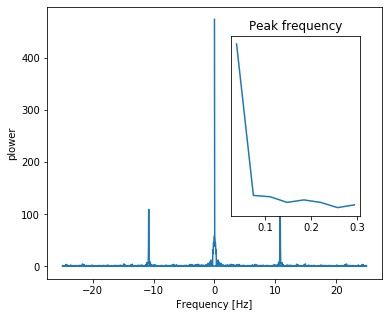

In [4]:
from scipy import fftpack
from matplotlib import pyplot as plt
fun=read_data("Data1/1_4_Mid.csv")
amplitude1=normalize_data(fun)
trans=amplitude1.transpose()
amplitude=trans[0]
len(amplitude)
sig=amplitude
time_step=0.02
period = 5.
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detecti

10.79587324981577


C:\Users\yetis\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


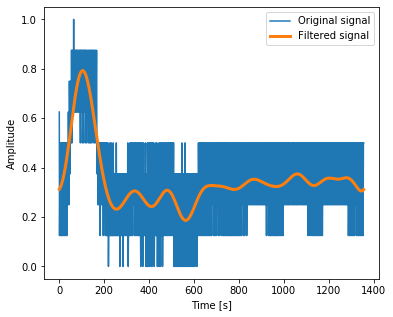

In [5]:
print(peak_freq)
import math
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) >0.45] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(sig, label='Original signal')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

0.8813224748101222 ---> 0.0


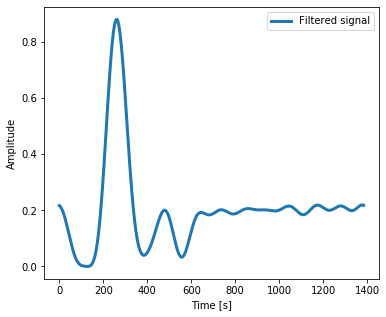

In [351]:
m=np.min(filtered_sig).real
ma=np.max((filtered_sig-m).real)
mi=np.min((filtered_sig-m).real)
plt.figure(figsize=(6, 5))

plt.plot(((filtered_sig-m).real), linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
print(ma,"--->",mi)

Text(0, 0.5, 'Amplitude')

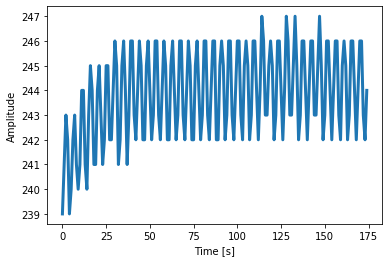

In [406]:
s=read_data("Data1/3_4.csv")

t=s.transpose()
p=t[6]
plt.plot(p[1535
           :1710], linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')